<a href="https://colab.research.google.com/github/Michaeljo112/BP/blob/main/desercion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este cuaderno contiene las soluciones de la prueba técnica. Se dive como se muestra en el índice de abajo para facilitar su revisión.

#1. Deserción

## 1.1 Datos

In [ ]:
# Leer parquetes/librerías
import pandas as pd
from pandas.api.types import is_numeric_dtype

In [ ]:
# Lectura de datos
url = r'https://raw.githubusercontent.com/vmoprojs/DataLectures/master/Bank_churn_modelling.csv'
df = pd.read_csv(url)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Devolver tipos de valores de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


El resumen anterior por variable muestra que no existen nulos en la tabla. <br>
Ahora estudiemos la distribución de las variables.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Aparentemente, los datos no presentan un comportamiento inusual. Sin emabargo, sería bueno tener en cuenta que el **25%** de los clientes registró balances 0 para el modelo.

## Exploración de datos

In [ ]:
n = len(df)
n_desertaron = sum(df["Exited"].astype(int))
n_no_desertaron = n - n_desertaron

print('El conjunto de datos contiene %s registros.' % (n))
print(f'El %s porciento de los clientes desertó.' % round(n_desertaron/n*100, 2))

El conjunto de datos contiene 10000 registros.
El 20.37 porciento de los clientes desertó.


In [ ]:
# Confuguraciones del sistema para ver los datos en la interfaz
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

In [ ]:
# Ajustamos el tipo de valores
# Para ello, creamos un diccionario de columna-tipo de dato
conversion_dict = {
    "CustomerId": str,
    "Surname": str,
    "Geography": str,
    "Gender": str,
    "IsActiveMember": str,
    "HasCrCard": str,
    "IsActiveMember": str
}

# Convertir tipos de datos utilizando el diccionario
df = df.astype(conversion_dict)

Ahora, vamos a crear gráficos descriptivos.

**Gráficos**

In [ ]:
# Descargar temas para gráficos
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle -P /tmp
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle -P /tmp

# Para revisar los estilos disponible se puede ejecutar plt.style.available

--2023-11-23 00:48:21--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40906 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine.mplstyle.2’

rose-pine.mplstyle. 100%[===================>]  39.95K  --.-KB/s    in 0.001s  

2023-11-23 00:48:21 (31.5 MB/s) - ‘/tmp/rose-pine.mplstyle.2’ saved [40906/40906]

--2023-11-23 00:48:21--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting r

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# A continuación, defino algunas variables para crear gráficos de resumen por cada variable
import matplotlib.pyplot as plt
# Para mostrar las visualizaciones en el cuaderno:
%matplotlib inline
from matplotlib.colors import ListedColormap
# Para ajustar textos números de los ejes (minior ticket labels):
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FormatStrFormatter
from matplotlib.ticker import FixedLocator
import seaborn as sns
import math
import numpy as np

# Configurar estilo
plt.style.use('ggplot')

def grafico_descript_categorica(data, variable, ax=None):
    # Cuando normalize=True, el resultado será la proporción de cada valor único
    # dividido por el número total de observaciones, lo que da como resultado un
    # valor entre 0 y 1 que representa la frecuencia relativa de cada categoría.
    df_tmp = data[variable].value_counts(normalize=True).reset_index()
    # Cambiar los nombres de las columnas
    df_tmp.columns = [variable, 'Frecuencia']

    # Asignaremos un color por variable; en este sentido, necesitamos recuperar
    # el número total de colores
    n_colors = len(df_tmp)

    # Dibujar gráfico
    plt.pie(df_tmp["Frecuencia"], labels=df_tmp[variable], autopct='%1.1f%%', startangle=90)

# Graficar descriptivos de variables categóricas
def mult_graph_cat(data, list_categorical):
    # Organizaremos el gráfico en n_rows filas y 2 columnas
    n_rows = math.ceil(len(list_categorical)/2)
    # Definimos el tamaño del gráfico
    fig = plt.figure(figsize=(12, n_rows*4.5))

    for i, variable in enumerate(list_categorical):
        # Insertamos sub-gráficos organizados en n_rows filas y 2 columnas
        ax = fig.add_subplot(n_rows, 2, i+1)
        grafico_descript_categorica(data, variable, ax=ax)
        # Agregamos como títulos sus categorías
        plt.title(variable)

    # Ajustar el espaciado entre subtramas
    plt.tight_layout()
    # Mostrar figura
    plt.show()

# Graficar descriptivos de variables continuas
def multiple_graph_cont(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(8, n_rows*3))
    palette = sns.color_palette('tab10', len(continuous))

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows, 4,i+1)
        sns.boxplot(x=data[variable], orient='v', palette=[palette[i]], ax=ax)
        ax.set_xlabel('')
        #ax.set_ylabel('')
        ax.set_title(variable, fontsize=((8*3)/n_rows)*1.3)

    plt.tight_layout()
    plt.show()

In [ ]:
# Creo dos listas: una que contenga nombres de variables categóricas y otra de continuas
continuous, categorical = [], []

# Excluímos del análsis descriptivo variables que tienen nombres, códigos de identificas o un índice de la fila de la tabla
black_list = ['RowNumber', 'CustomerId', 'Surname', 'Exited']

for col in [c for c in df.columns if c not in black_list and c != 'label']:
    if is_numeric_dtype(df[col]):
        continuous.append(col)
    else:
        categorical.append(col)

In [ ]:
# Constantemos que no haya habido ningún problema:
categorical, continuous

(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'],
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'EstimatedSalary'])

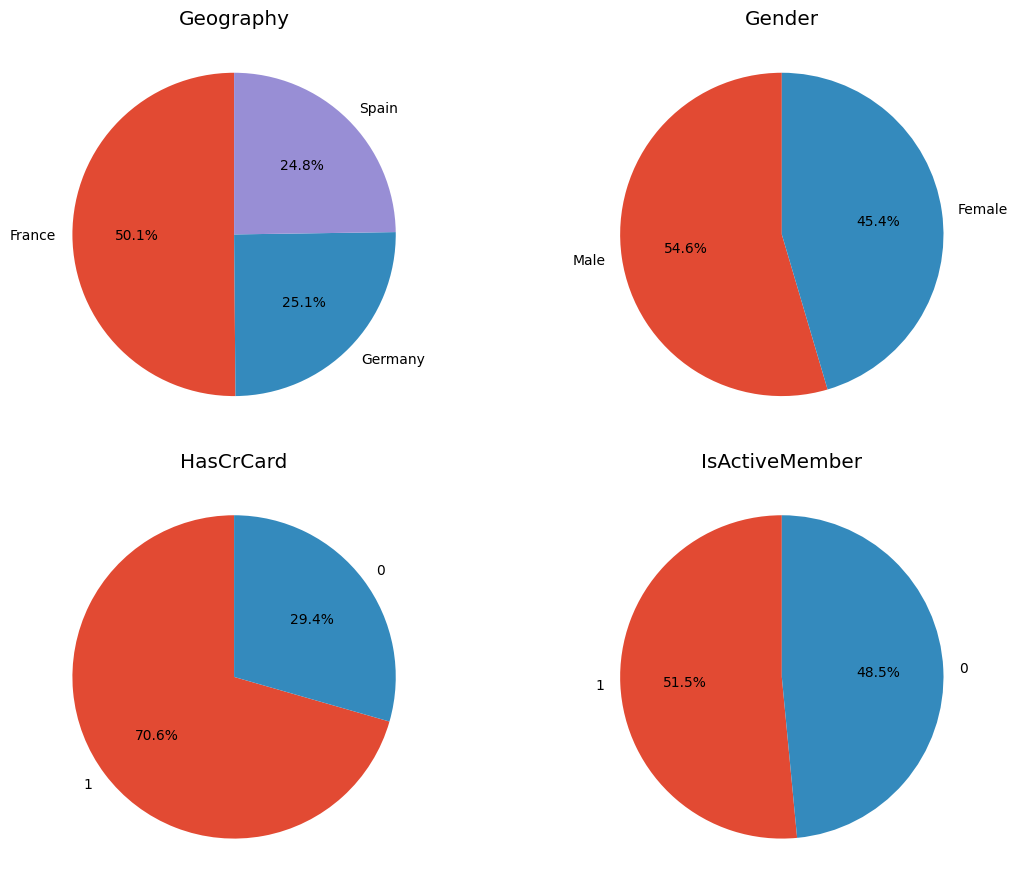

In [ ]:
# Muestro las distribuciones para las variables categóricas
mult_graph_cat(df, categorical)

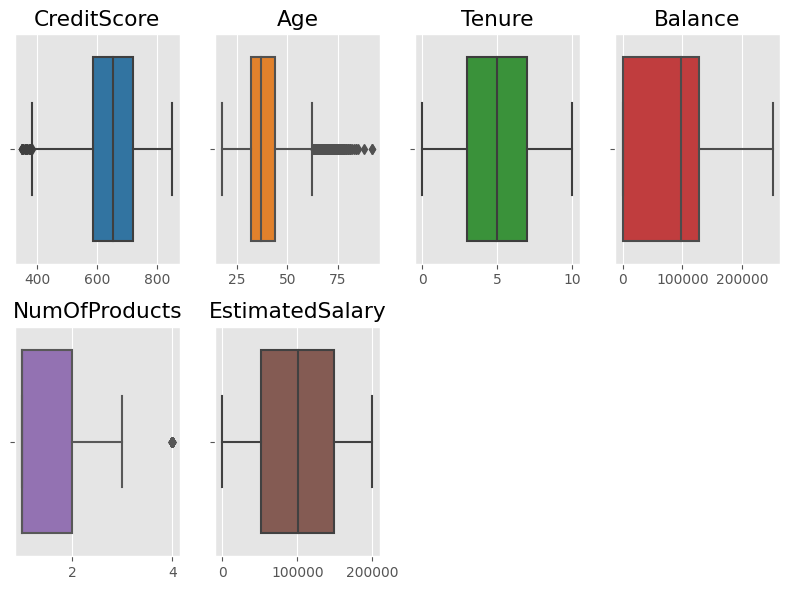

In [ ]:
# Muestro la distribución para variables continuas
import warnings
warnings.filterwarnings("ignore")
multiple_graph_cont(df, continuous)

Las distribuciones del CreditScore y Age muestran sesgos. En el primer caso, los scores de crédito se sesgan a la derecha y hay valores extremos a la izquiera; lo que hace sentido: algunos casos de clientes con scores muy bajo, por debajo de 400 (ver gráfica posterior).

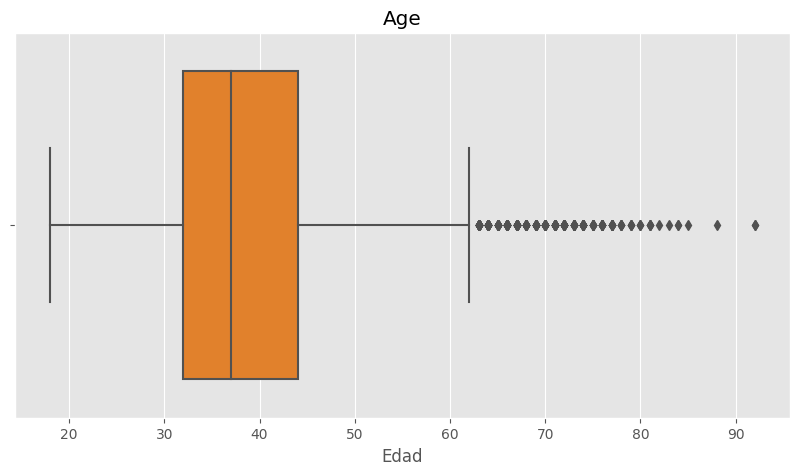

In [ ]:
import seaborn as sns
n_rows = math.ceil(len(continuous)/3)
palette = sns.color_palette('tab10', len(continuous))

fig, ax = plt.subplots( figsize=(10, 5))
sns.boxplot(x=df["Age"], orient='v', palette=[palette[1]], ax=ax)
ax.set_xlabel("Edad")
plt.title("Age")
plt.show()

En segundo lugar, 75% de clientes tiene edades inferiores a 44. Nótese también cómo hay extremos después de los aproximadamente los 60 años (ver figura de abajo).

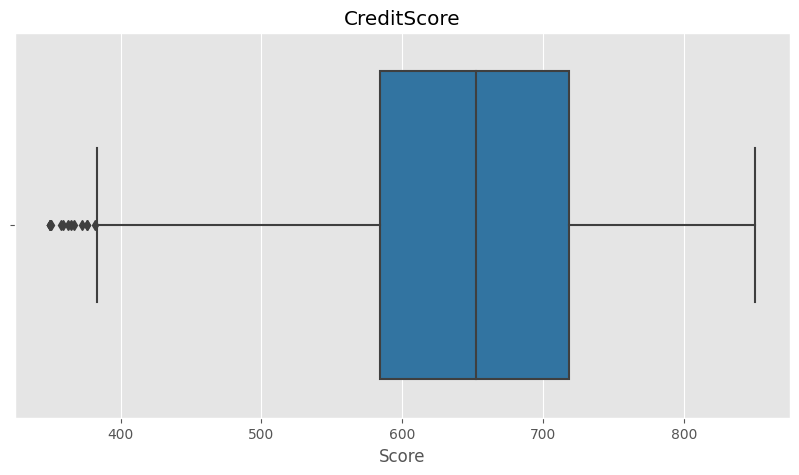

In [ ]:
import seaborn as sns
n_rows = math.ceil(len(continuous)/3)
palette = sns.color_palette('tab10', len(continuous))

fig, ax = plt.subplots( figsize=(10, 5))
sns.boxplot(x=df["CreditScore"], orient='v', palette=[palette[0]], ax=ax)
ax.set_xlabel("Score")
plt.title("CreditScore")
plt.show()

Así mismo se observa que las distribuciones de Balance y Número de productos se sesgan hacia abajo. Los balances son, en general, para el 75% de clientes menores o igual a 127.600 dólares. Y estos clientes, a groso modo, con máximo 2 productos. Lo dicho se puede confirmar con las tablas presentadas a continuación.

In [ ]:
# Crear una tabla cruzada de las ventas por región y producto
print(df['NumOfProducts'].describe())
print("\n")
print(df['Balance'].describe())

count   10,000.00
mean         1.53
std          0.58
min          1.00
25%          1.00
50%          1.00
75%          2.00
max          4.00
Name: NumOfProducts, dtype: float64


count    10,000.00
mean     76,485.89
std      62,397.41
min           0.00
25%           0.00
50%      97,198.54
75%     127,644.24
max     250,898.09
Name: Balance, dtype: float64


## **Selección de variables**

### Weigth of Evidence (WOE) and Information Value (IV)

En virtud del tiempo para resolver el examen, con el fin de elegir las variables más óptimas, por una parte, emplearé el peso de la evidencia, WOE, y el valor de la información, IV, como métodos para seleccionar las variables del modelo; ambas son técnicas sencillas pero poderosas para elegir variables predictivas. Los conceptos de sus cálculos están muy relacionados con el  modelado por regresión logística. De hecho, se utilizan ampliamente en la calificación crediticia para medir la separación entre buenos y malos clientes por ejemplo.
<br>

Las ventajas de la transformación WOE son:

<ul>
  <li>Maneja los valores que faltan.</li>
  <li>Maneja valores atípicos.</li>
  <li>La transformación se basa en el valor logarítmico de las distribuciones.</li>
  <li>Se ajusta a la función de salida de la regresión logística.</li>
  <li>No necesita variables ficticias.</li>
  <li>Utilizando la técnica de binning adecuada, se puede establecer una relación monótona (aumento o disminución) entre la variable independiente y la dependiente.</li>
</ul>

Por otra emplearé resultados descritivos, emplearé análisis descriptivos y una identificación más refinada.

A continuación computo los IV por cada variables.

In [ ]:
# Inspirándome en las funciones de Laudia Nazarko para obtener IV, que constan en https://github.com/klaudia-nazarko/iv-and-woe-python/blob/master/Features.py,
# escribí mis propias funciones para las medidas.
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Defino una clase para analizar información de tipo categórica
class CategoricalFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature

    @property
    def df_lite(self):
        df_lite = self.df
        df_lite['bin'] = df_lite[self.feature].fillna('MISSING')
        return df_lite[['bin', 'Exited']]

# Defino una clase para analizar información de tipo continua
class ContinuousFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature
        # 5% debe ser el tamaño del intervalo
        self.bin_min_size = int(len(self.df) * 0.05)

    def __generate_bins(self, bins_num):
        df = self.df[[self.feature, 'Exited']]
        df['bin'] = pd.qcut(df[self.feature], bins_num, duplicates='drop') \
                    .apply(lambda x: x.left) \
                    .astype(float)
        return df

    # Máximo 20 intervalos
    def __generate_correct_bins(self, bins_max=20):
        for bins_num in range(bins_max, 1, -1):
            df = self.__generate_bins(bins_num)
            df_grouped = pd.DataFrame(df.groupby('bin') \
                                      .agg({self.feature: 'count',
                                            'Exited': 'sum'})) \
                                      .reset_index()
            r, p = stats.stats.spearmanr(df_grouped['bin'], df_grouped['Exited'])

            if (
                    abs(r)==1 and                                                        # Checa si los WOE por intervalo son monótonos
                    df_grouped[self.feature].min() > self.bin_min_size                   # Checa si un intervali es más grande que el 5%
                    and not (df_grouped[self.feature] == df_grouped['Exited']).any()     # Checa si el número de clientes que desertó o no no es igual a 0
            ):
                break

        return df

    @property
    def df_lite(self):
        df_lite = self.__generate_correct_bins()
        df_lite['bin'].fillna('MISSING', inplace=True)
        return df_lite[['bin', 'Exited']]


# Además, defino clases para analizar y calcular WOE e IV por bins
pd.set_option('mode.chained_assignment', None)

# pd.set_option('mode.chained_assignment', None) es un método de configuración
# de pandas que se utiliza para desactivar la advertencia de chained assignment
# (asignación encadenada).

class AttributeRelevance():
    def seq_palette(self, n_colors):
        return sns.cubehelix_palette(n_colors, start=.5, rot=-.75, reverse=True)
        # La función sns.cubehelix_palette() de la librería Seaborn se utiliza para
        # generar una paleta de colores en forma de rampa de colores linealmente
        # variados en el espacio de color cubehelix.

    def bulk_iv(self, feats, iv, woe_extremes=False):
        iv_dict = {}
        for f in feats:
            iv_df, iv_value = iv.calculate_iv(f)
            if woe_extremes:
                iv_dict[f.feature] = [iv_value, iv_df['woe'].min(), iv_df['woe'].max()]
                cols = ['iv', 'woe_min', 'woe_max']
            else:
                iv_dict[f.feature] = iv_value
                cols = ['iv']
        df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=cols)
        return df

    def bulk_stats(self, feats, s):
        stats_dict = {}
        for f in feats:
            p_value, effect_size = s.calculate_chi(f)
            stats_dict[f.feature] = [p_value, effect_size]
        df = pd.DataFrame.from_dict(stats_dict, orient='index', columns=['p-value', 'effect_size'])
        return df

    def analyze(self, feats, iv, s=None, interpretation=False):
        df_iv = self.bulk_iv(feats, iv).sort_values(by='iv', ascending=False)
        if s is not None:
            df_stats = self.bulk_stats(feats, s)
            df_iv = df_iv.merge(df_stats, left_index=True, right_index=True)
        if interpretation:
            df_iv['iv_interpretation'] = df_iv['iv'].apply(iv.interpretation)
            if s is not None:
                df_iv['es_interpretation'] = df_iv['effect_size'].apply(s.interpretation)
        return df_iv

    def draw_iv(self, feats, iv):
        df = self.analyze(feats, iv)
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=df.index, y='iv', data=df, palette=self.seq_palette(len(feats)))
        ax.set_title('valores IV')
        plt.xticks(rotation=90)
        plt.show()

    def draw_woe_extremes(self, feats, iv):
        df = self.bulk_iv(feats, iv, woe_extremes=True).sort_values(by='iv', ascending=False)
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=df.index, y='woe_min', data=df, palette=self.seq_palette(len(feats)))
        sns.barplot(x=df.index, y='woe_max', data=df, palette=self.seq_palette(len(feats)))
        ax.axhline(y=0, color='black', linewidth=1)
        ax.set_title('Rango de valores WOE')
        ax.set_ylabel('WOE')
        plt.xticks(rotation=90)
        plt.show()

    def draw_woe_multiplot(self, feats, iv):
        n = len(feats)
        nrows = int(np.ceil(n/3))
        fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*4))
        for i in range(n):
            iv_df, iv_value = iv.calculate_iv(feats[i])
            sns.barplot(x=feats[i].feature, y='woe', data=iv_df, color='#455872', ax=fig.axes[i])

        for ax in fig.axes:
            plt.sca(ax)
            plt.xticks(rotation=50)

        plt.tight_layout()
        plt.show()

class Analysis():
    def seq_palette(self, n_colors):
        return sns.cubehelix_palette(n_colors, start=.5, rot=-.75, reverse=True)

    def group_by_feature(self, feat):
        df = feat.df_lite \
                            .groupby('bin') \
                            .agg({'Exited': ['count', 'sum']}) \
                            .reset_index()
        df.columns = [feat.feature, 'count', 'desertor']
        df['no_desertor'] = df['count'] - df['desertor']
        return df

class StatsSignificance(Analysis):
    def calculate_chi(self, feat):
        df = self.group_by_feature(feat)
        df_chi = np.array(df[['desertor', 'no_desertor']])
        n = df['count'].sum()

        chi = stats.chi2_contingency(df_chi)
        cramers_v = np.sqrt(chi[0] / n)          # k=2 (good, bad)
        return chi[1], cramers_v

    @staticmethod
    def interpretation(cramers_v):
        if cramers_v < 0.1:
            return 'inútil'
        elif cramers_v < 0.2:
            return 'débil'
        elif cramers_v < 0.4:
            return 'medio'
        elif cramers_v < 0.6:
            return 'fuerte'
        else:
            return 'muy fuerte'

    def interpret_chi(self, feat):
        _, cramers_v = self.calculate_chi(feat)
        return self.interpretation(cramers_v)

    def print_chi(self, feat):
        p_value, cramers_v = self.calculate_chi(feat)
        print('P-value: %0.2f\nEffect size: %0.2f' % (p_value, cramers_v))
        print('%s is a %s predictor' % (feat.feature.capitalize(), self.interpretation(cramers_v)))

class IV(Analysis):
    @staticmethod
    def __perc_share(df, group_name):
        return df[group_name] / df[group_name].sum()

    def __calculate_perc_share(self, feat):
        df = self.group_by_feature(feat)
        df['perc_desertor'] = self.__perc_share(df, 'desertor')
        df['perc_no_desertor'] = self.__perc_share(df, 'no_desertor')
        df['perc_diff'] = df['perc_desertor'] - df['perc_no_desertor']
        return df

    def __calculate_woe(self, feat):
        df = self.__calculate_perc_share(feat)
        df['woe'] = np.log(df['perc_desertor']/df['perc_no_desertor'])
        df['woe'] = df['woe'].replace([np.inf, -np.inf], np.nan).fillna(0)
        return df

    def calculate_iv(self, feat):
        df = self.__calculate_woe(feat)
        df['iv'] = df['perc_diff'] * df['woe']
        return df, df['iv'].sum()

    def draw_woe(self, feat):
        iv_df, iv_value = self.calculate_iv(feat)
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=feat.feature, y='woe', data=iv_df, palette=self.seq_palette(len(iv_df.index)))
        ax.set_title('WOE de ' + feat.feature)
        plt.show()
        plt.show()

    @staticmethod
    def interpretation(iv):
        if iv < 0.02:
            return 'inútil'
        elif iv < 0.1:
            return 'débil'
        elif iv < 0.3:
            return 'medio'
        elif iv < 0.5:
            return 'fuerte'
        else:
            return 'sospechoso'

    def interpret_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        return self.interpretation(iv)

    def print_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        print('Information value: %0.2f' % iv)
        print('%s es un predictor %s' % (feat.feature.capitalize(), self.interpretation(iv)))

In [ ]:
# Antes, revisemos brevemente la relación de estas variables, para asegurarnos de que contengan informaicón del mismo fenómeno
# Estas variables no son  iguales
pd.crosstab(df['IsActiveMember'], df['Exited'])
# No sobraba analizarlas.

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [ ]:
# Creo un df a parte para el análisis que no incluya variables que no son útiles para fines analíticos
df_ref = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [ ]:
# Voy a instanciar la clase IV para usar sus propiedades y funciones
iv = IV()

In [ ]:
# Construyo un objeto por columna, dependiendo de si es categporica o discreta
feats_dict = {}

for col in [c for c in df_ref.columns if c != 'Exited']:
    if is_numeric_dtype(df_ref[col]):
        feats_dict[col] = ContinuousFeature(df_ref, col)
    else:
        feats_dict[col] = CategoricalFeature(df_ref, col)

feats = list(feats_dict.values())

In [ ]:
# Por ejemplo, vamos a calcular el iv para HasCrCard
feat_isactmem = CategoricalFeature(df, 'IsActiveMember')

In [ ]:
# Uso la clase calculate_iv para obtener las medidas
iv_df, iv_value = iv.calculate_iv(feat_isactmem)
display(iv_df)
print('Information value: ', iv_value)

,IsActiveMember,count,desertor,no_desertor,perc_desertor,perc_no_desertor,perc_diff,woe,iv
0,0,4849,1302,3547,0.64,0.45,0.19,0.36,0.07
1,1,5151,735,4416,0.36,0.55,-0.19,-0.43,0.08


Information value:  0.15323263689359579


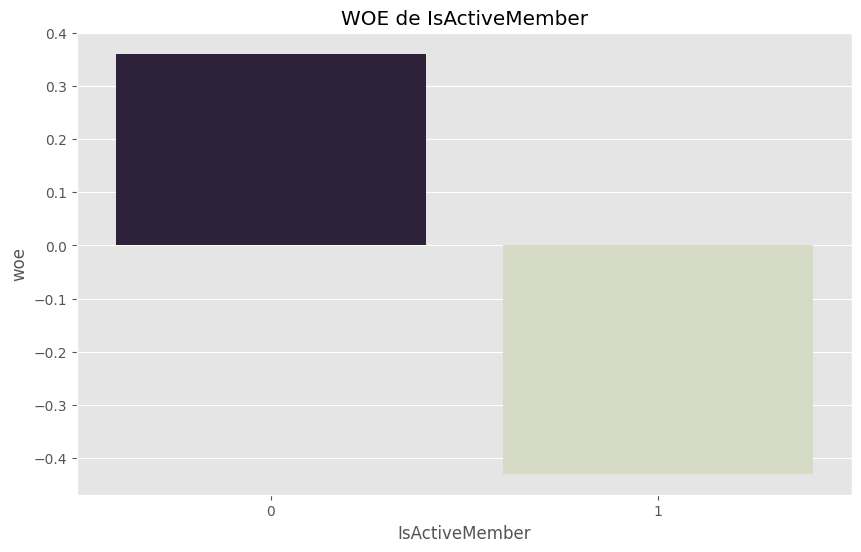

In [ ]:
# Visualicemos los WOE
iv.draw_woe(feat_isactmem)

In [ ]:
print(f'%s es un predictor %s' % (feat_isactmem.feature.capitalize(), iv.interpret_iv(feat_isactmem)))
iv.print_iv(feat_isactmem)
print(f'(Si IV = 0.2 el predictor es %s)' % iv.interpretation(0.2))

Isactivemember es un predictor medio
Information value: 0.15
Isactivemember es un predictor medio
(Si IV = 0.2 el predictor es medio)


### **Clase de significación estadística**

In [ ]:
# Ahora estudiemos la significancia de las varibales
s = StatsSignificance()

In [ ]:
# Obteniendo el p-valor para el mismo ejemplo:
p_value, effect_size = s.calculate_chi(feat_isactmem)
print('p-value: %0.2f' % p_value)
print('effect size: %0.2f' % effect_size)

p-value: 0.00
effect size: 0.16


In [ ]:
print('%s es un predictor %s' % (feat_isactmem.feature.capitalize(), s.interpret_chi(feat_isactmem)))
print()
s.print_chi(feat_isactmem)
print('Un effect size = 0.2 is a %s predictor.' % s.interpretation(0.2))

Isactivemember es un predictor débil

P-value: 0.00
Effect size: 0.16
Isactivemember is a débil predictor
Un effect size = 0.2 is a medio predictor.


In [ ]:
ar = AttributeRelevance()
# Ahora vamos a obtener los IV para cada variable
import warnings
warnings.filterwarnings("ignore")
ar.bulk_iv(feats, iv, woe_extremes=True).sort_values(by="iv", ascending=False)

,iv,woe_min,woe_max
Age,0.76,-1.14,1.18
Geography,0.17,-0.28,0.63
IsActiveMember,0.15,-0.43,0.36
Balance,0.09,-0.31,0.32
Gender,0.07,-0.26,0.27
CreditScore,0.00,-0.04,0.07
Tenure,0.00,-0.04,0.03
EstimatedSalary,0.00,-0.03,0.03
HasCrCard,0.00,-0.01,0.03
NumOfProducts,0.00,0.00,0.00


In [ ]:
# Obtengamos ahora un resumen para todas las variables
ar.analyze(feats, iv, s, interpretation=True)

,iv,p-value,effect_size,iv_interpretation,es_interpretation
Age,0.76,0.00,0.36,sospechoso,medio
Geography,0.17,0.00,0.17,medio,débil
IsActiveMember,0.15,0.00,0.16,medio,débil
Balance,0.09,0.00,0.12,débil,débil
Gender,0.07,0.00,0.11,débil,débil
CreditScore,0.00,0.12,0.02,inútil,inútil
Tenure,0.00,0.12,0.02,inútil,inútil
EstimatedSalary,0.00,0.25,0.01,inútil,inútil
HasCrCard,0.00,0.49,0.01,inútil,inútil
NumOfProducts,0.00,1.00,0.00,inútil,inútil


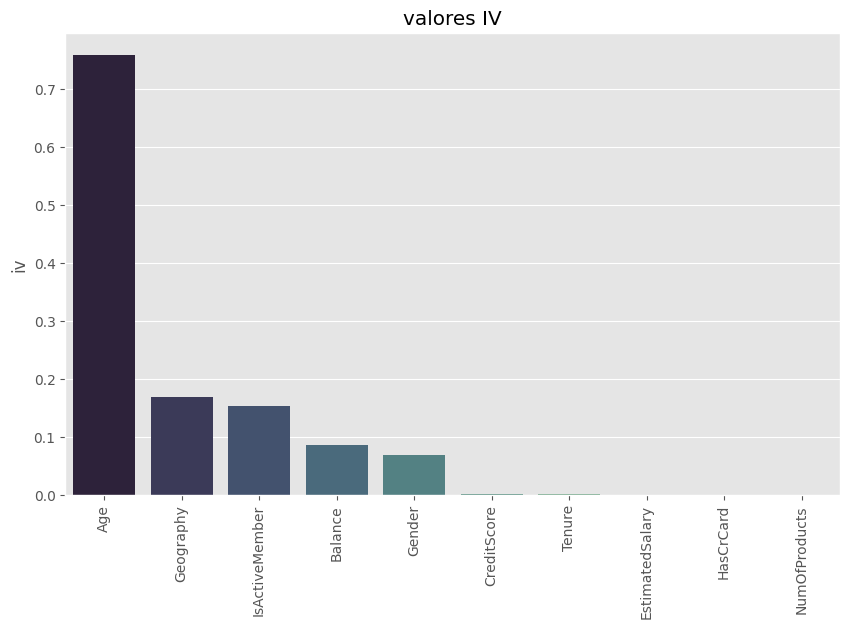

In [ ]:
# Dibujemos por orden las que tienen mejor medida
ar.draw_iv(feats, iv)

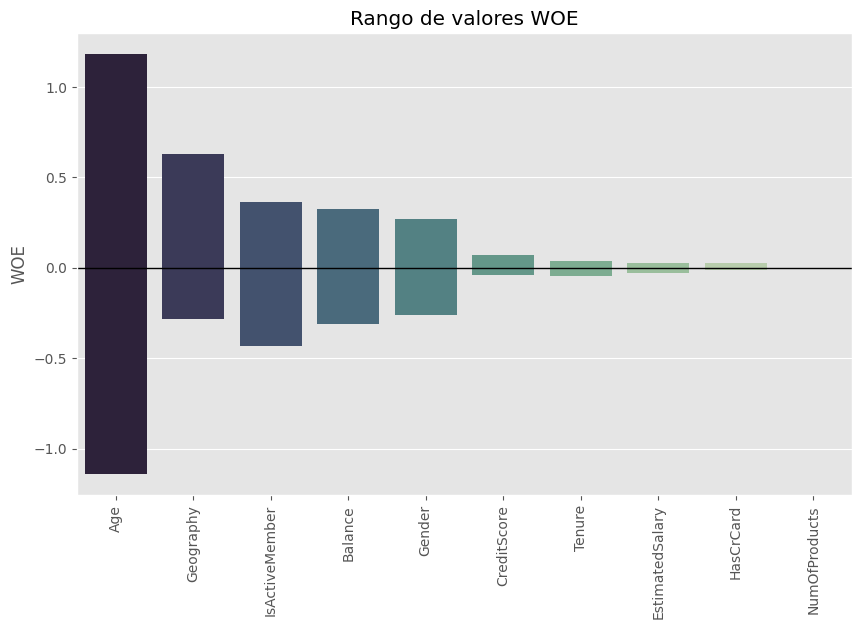

In [ ]:
# rangos de WOE
ar.draw_woe_extremes(feats, iv)

,iv,p-value,effect_size,iv_interpretation,es_interpretation
Age,0.76,0.00,0.36,sospechoso,medio
Geography,0.17,0.00,0.17,medio,débil
IsActiveMember,0.15,0.00,0.16,medio,débil
Balance,0.09,0.00,0.12,débil,débil
Gender,0.07,0.00,0.11,débil,débil
CreditScore,0.00,0.12,0.02,inútil,inútil
Tenure,0.00,0.12,0.02,inútil,inútil
EstimatedSalary,0.00,0.25,0.01,inútil,inútil
HasCrCard,0.00,0.49,0.01,inútil,inútil
NumOfProducts,0.00,1.00,0.00,inútil,inútil


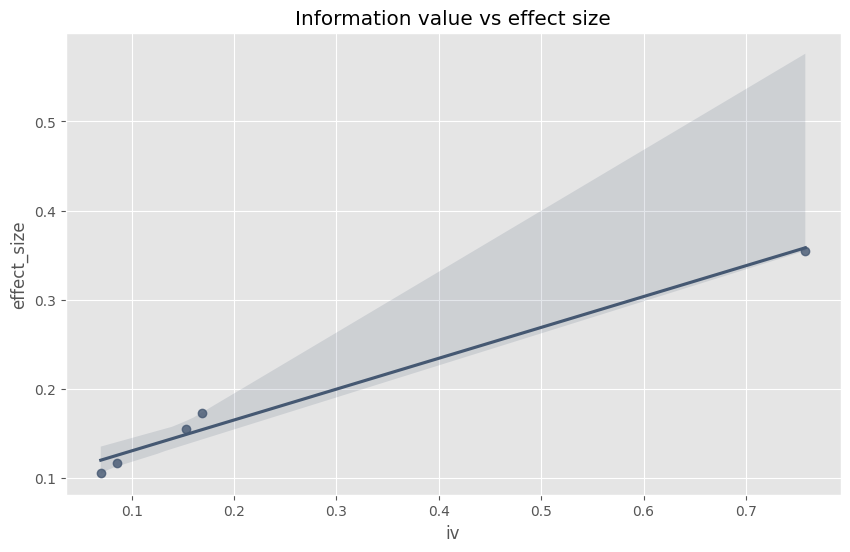

Pearson correlation: 0.99
Spearman correlation: 1.00


In [ ]:
df_analysis = ar.analyze(feats, iv, s, interpretation=True)
display(df_analysis)

# Mostrar resultados de significancia y IV
df_analysis_sign = df_analysis[df_analysis['p-value']<0.05]

fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='iv', y='effect_size', data=df_analysis_sign, color='#455872')
ax.set_title('Information value vs effect size')
plt.show()

print('Pearson correlation: %0.2f' % df_analysis_sign['iv'].corr(df_analysis_sign['effect_size']))
print('Spearman correlation: %0.2f' % df_analysis_sign['iv'].corr(df_analysis_sign['effect_size'], method='spearman'))

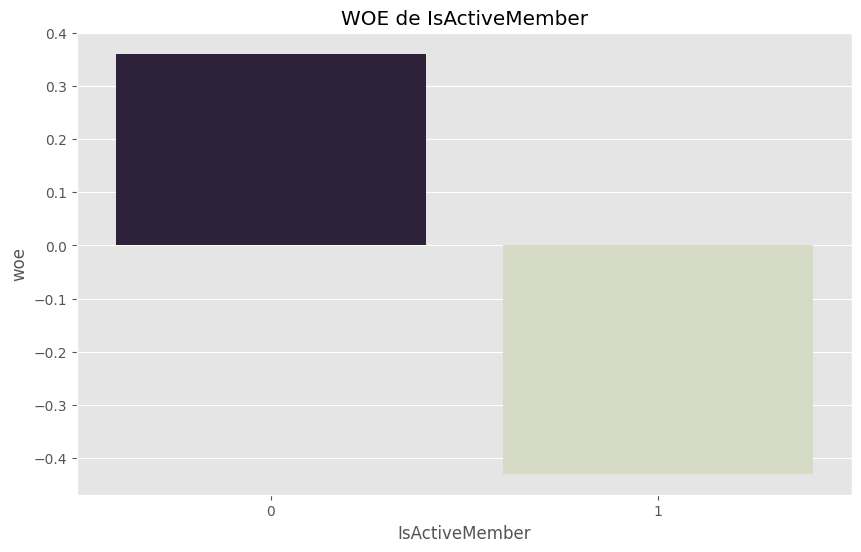

In [ ]:
# Examinemos, por ejemplo, la relación de Age con Exited
iv.draw_woe(feats_dict['IsActiveMember'])

In [ ]:
feat_isactmem = iv.group_by_feature(feats_dict['IsActiveMember'])
feat_isactmem

,IsActiveMember,count,desertor,no_desertor
0,0,4849,1302,3547
1,1,5151,735,4416


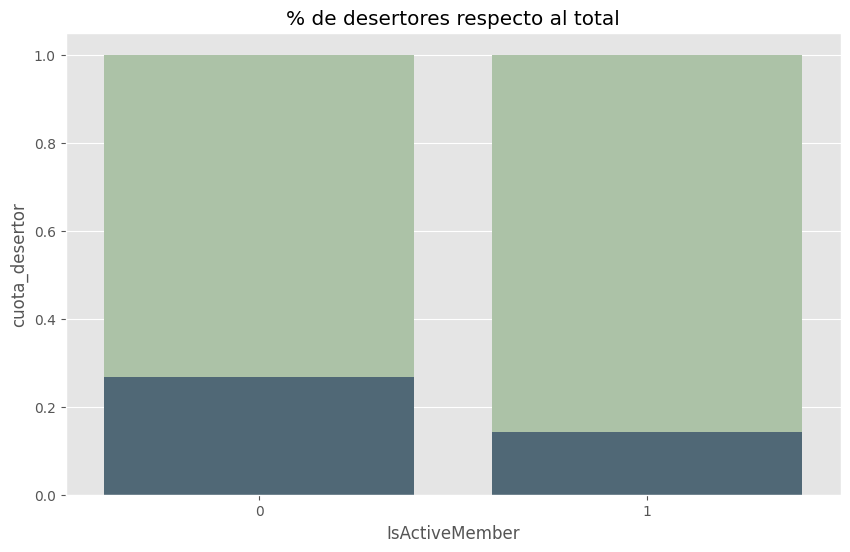

In [ ]:
feat_isactmem = iv.group_by_feature(feats_dict['IsActiveMember'])
feat_isactmem['total'] = 1
feat_isactmem['cuota_desertor'] = feat_isactmem['desertor']/feat_isactmem['count']

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='IsActiveMember', y='total', data=feat_isactmem, color='#a9c6a3')
sns.barplot(x='IsActiveMember', y='cuota_desertor', data=feat_isactmem, color='#4a6a7c')
ax.set_title("% de desertores respecto al total")
plt.show()

### **Análisis descriptivo**

In [ ]:
# Lectura de datos
url = r'https://raw.githubusercontent.com/vmoprojs/DataLectures/master/Bank_churn_modelling.csv'
df = pd.read_csv(url)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


0   79.63
1   20.37
Name: Exited, dtype: float64


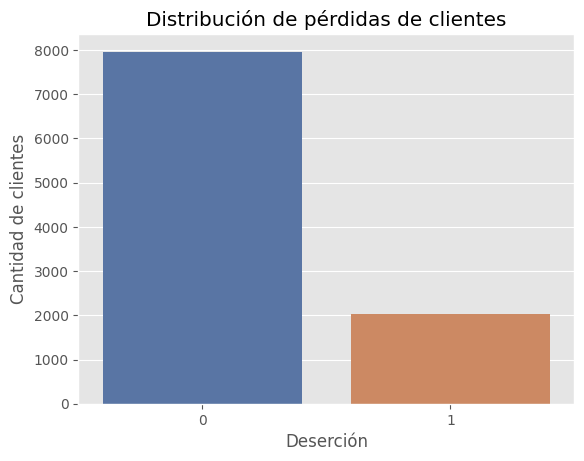

In [ ]:
print(df['Exited'].value_counts(normalize=True)*100)

palette='deep'
sns.set_palette(palette)

sns.countplot(data=df, x='Exited')

plt.xlabel('Deserción')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de pérdidas de clientes')

plt.show()

In [ ]:
df.groupby('Geography')['Exited'].value_counts(normalize=True).mul(100)

Geography  Exited
France     0        83.85
           1        16.15
Germany    0        67.56
           1        32.44
Spain      0        83.33
           1        16.67
Name: Exited, dtype: float64

In [ ]:
df.groupby('Gender')['Exited'].value_counts(normalize=True).mul(100)

Gender  Exited
Female  0        74.93
        1        25.07
Male    0        83.54
        1        16.46
Name: Exited, dtype: float64

In [ ]:
print(df['Tenure'].value_counts(normalize=True).mul(100).sort_index())
print()
print(df['HasCrCard'].value_counts().sort_index())

0     4.13
1    10.35
2    10.48
3    10.09
4     9.89
5    10.12
6     9.67
7    10.28
8    10.25
9     9.84
10    4.90
Name: Tenure, dtype: float64

0    2945
1    7055
Name: HasCrCard, dtype: int64


In [ ]:
print(df['IsActiveMember'].value_counts().sort_index())
print("\n")
print(round(df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).mul(100),2))

0    4849
1    5151
Name: IsActiveMember, dtype: int64


IsActiveMember  Exited
0               0        73.15
                1        26.85
1               0        85.73
                1        14.27
Name: Exited, dtype: float64


Pese a que en la subsección anterior analizamos la distribución de la edad, graficaremos un historgrama para resaltarla mejor al ojo. Para esto, abajo calculamos el tamaño óptimo de los intervalos por reglas Scott y Freedman-Diaconis.

In [ ]:
# Calcular el número óptimo de intervalos utilizando la regla de Scott
n = len(df['Age'])
ancho_bin_scott = 3.5 * np.std(df['Age']) / (n**(1/3))  # Ancho de intervalo según la regla de Scott
num_intervalos_scott = int((max(df['Age']) - min(df['Age'])) / ancho_bin_scott)  # Número de intervalos según la regla de Scott

# Calcular el número óptimo de intervalos utilizando la regla de Freedman-Diaconis
q25, q75 = np.percentile(df['Age'], [25, 75])
iqr = q75 - q25  # Rango intercuartílico
ancho_bin_fd = 2 * iqr / (n**(1/3))  # Ancho de intervalo según la regla de Freedman-Diaconis
num_intervalos_fd = int((max(df['Age']) - min(df['Age'])) / ancho_bin_fd)  # Número de intervalos según la regla de Freedman-Diaconis

# Imprimir el número óptimo de intervalos según ambas reglas
print("Número óptimo de intervalos según la regla de Scott:", num_intervalos_scott)
print("Número óptimo de intervalos según la regla de Freedman-Diaconis:", num_intervalos_fd)

Número óptimo de intervalos según la regla de Scott: 43
Número óptimo de intervalos según la regla de Freedman-Diaconis: 66


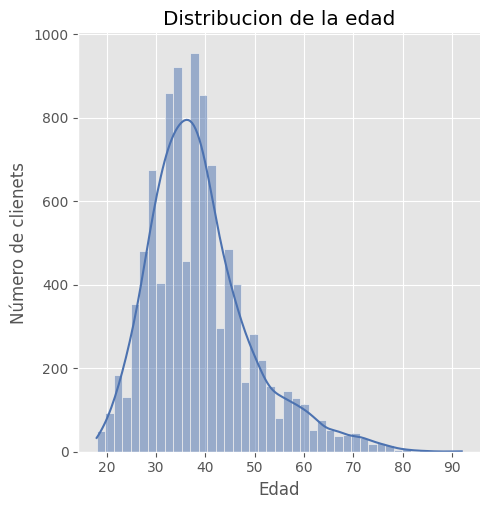

In [ ]:
# Distribución de edad con 43 intervalos
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='Age', kde=True, bins=43)

plt.xlabel('Edad')
plt.ylabel('Número de clienets')
plt.title('Distribucion de la edad')

plt.show()

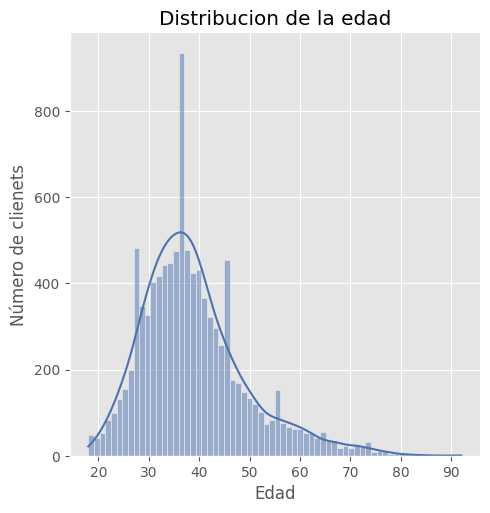

In [ ]:
# Distribución de edad con 66 intervalos
palette = "deep"
sns.set_palette(palette)

sns.displot(data=df, x='Age', kde=True, bins=66)

plt.xlabel('Edad')
plt.ylabel('Número de clienets')
plt.title('Distribucion de la edad')

plt.show()

### Datos insumo modelo

In [ ]:
# Eliminar filas que no son útiles para fines analíticos
print("Filas y columnas antes de la depuración : ", df.shape)
drop_columns = ['RowNumber','CustomerId','Surname']
df.drop(drop_columns,axis=1, inplace=True)
print("Filas y columnas post depuración: ", df.shape)

Filas y columnas antes de la depuración :  (10000, 14)
Filas y columnas post depuración:  (10000, 11)


In [ ]:
# Por conveniencia, creeremos variables dicotómicas para cada variable categórica
categorical_columns = ['Geography','Gender']

# Creamos dicotómicas para las categóricas
one_hot_encoded = pd.get_dummies(df[categorical_columns])

# Las añadimos al df
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

# Eliminamos las variables, ya que ya existen las dicotómicas
df_encoded.drop(categorical_columns,axis=1,inplace=True)

In [ ]:
# Además, ejecutaremos un tranformación de variables continuas: las entandarizaremos
continuous_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
# Uso de escala mínima y máxima
scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.54,0.32,0.20,0.00,0.00,1,1,0.51,1,1,0,0,1,0
1,0.52,0.31,0.10,0.33,0.00,0,1,0.56,0,0,0,1,1,0
2,0.30,0.32,0.80,0.64,0.67,1,0,0.57,1,1,0,0,1,0
3,0.70,0.28,0.10,0.00,0.33,0,0,0.47,0,1,0,0,1,0
4,1.00,0.34,0.20,0.50,0.00,1,1,0.40,0,0,0,1,1,0


# **Modelos**

Teniendo en cuenta los resultados anteriores, a continuación definimos un grupo de modelos para encontrar el mejor.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [ ]:
# Crear vector y y matriz de regresores
X = df_encoded.drop('Exited',axis=1)
y = df_encoded['Exited']

# Creamos un conjunto de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(f'El tamaño del conjunto de entranmiento de las regresoras es %s registros.' % X_train.shape[0])
print(f'El tamaño del conjunto de pruebas de las regresoras es %s registros.' % X_test.shape[0])
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_train.shape)
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_test.shape)

El tamaño del conjunto de entranmiento de las regresoras es 8000 registros.
El tamaño del conjunto de pruebas de las regresoras es 2000 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 8000 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 2000 registros.


Para el Logitlogit simularemos un modelo con sugeridas por los Information Values, y con todas, para ver diferencias.

In [ ]:
# Crear vector y y matriz de regresores
X = df_encoded.drop('Exited',axis=1)
# Seleccionemos solo las variables IV
X = X[['Age', 'Balance', 'IsActiveMember', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']]
y = df_encoded['Exited']

# Creamos un conjunto de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(f'El tamaño del conjunto de entranmiento de las regresoras es %s registros.' % X_train.shape[0])
print(f'El tamaño del conjunto de pruebas de las regresoras es %s registros.' % X_test.shape[0])
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_train.shape)
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_test.shape)

El tamaño del conjunto de entranmiento de las regresoras es 8000 registros.
El tamaño del conjunto de pruebas de las regresoras es 2000 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 8000 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 2000 registros.


In [ ]:
# Creemos un logit
clf_name, clf = ('Regresión logística', LogisticRegression())

# Realizar la validación cruzada
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Calcular las métricas medias de rendimiento
avg_accuracy = scores.mean()
avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

# Print the performance metrics
print(f'Modelo/clasificador: {clf_name}')
print(f'accuaracy: {avg_accuracy:.4f}')
print(f'precision_macro: {avg_precision:.4f}')
print(f'recall_macro: {avg_recall:.4f}')
print('-----------------------------------------')

Modelo/clasificador: Regresión logística
accuaracy: 0.8144
precision_macro: 0.7303
recall_macro: 0.5915
-----------------------------------------


Sin usar IV, considerando todas las variables:

In [ ]:
# Crear vector y y matriz de regresores
X = df_encoded.drop('Exited',axis=1)
y = df_encoded['Exited']

# Creamos un conjunto de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(f'El tamaño del conjunto de entranmiento de las regresoras es %s registros.' % X_train.shape[0])
print(f'El tamaño del conjunto de pruebas de las regresoras es %s registros.' % X_test.shape[0])
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_train.shape)
print(f'El tamaño del conjunto de entranmiento de la variable regresada es %s registros.' % y_test.shape)

El tamaño del conjunto de entranmiento de las regresoras es 8000 registros.
El tamaño del conjunto de pruebas de las regresoras es 2000 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 8000 registros.
El tamaño del conjunto de entranmiento de la variable regresada es 2000 registros.


In [ ]:
# Creemos un logit
clf_name, clf = ('Regresión logística', LogisticRegression())

# Realizar la validación cruzada
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Calcular las métricas medias de rendimiento
avg_accuracy = scores.mean()
avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

# Print the performance metrics
print(f'Modelo/clasificador: {clf_name}')
print(f'accuaracy: {avg_accuracy:.4f}')
print(f'precision_macro: {avg_precision:.4f}')
print(f'recall_macro: {avg_recall:.4f}')
print('-----------------------------------------')

Modelo/clasificador: Regresión logística
accuaracy: 0.8139
precision_macro: 0.7269
recall_macro: 0.5928
-----------------------------------------


Los resultados sugieren que no hay mayor diferencia si incluímos todas las variables o las que IV sugiere como buenas predictoras.

### Modelos competidores

In [ ]:
# Podemos comparar varios modelos. Eso haremos.
# Creamos una lista de los modelos que vamos a usar
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB', GaussianNB()),
    ('XGB', xgb.XGBClassifier())
]

In [ ]:
# Iteramos para cada modelo de la lista y lo evaluamos
for clf_name, clf in classifiers:
    # Validación cruzada
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calcular métricas de rendimiento
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

    # Print métricas de rendimiento
    print(f'Modelo/clasificador: {clf_name}')
    print(f'Average Accuracy (scoring: accuracy): {avg_accuracy:.4f}')
    print(f'Average Precision (scoring: precision_macro): {avg_precision:.4f}')
    print(f'Average Recall (scoring: recall_macro): {avg_recall:.4f}')
    print('-----------------------')

Modelo/clasificador: Logistic Regression
Average Accuracy (scoring: accuracy): 0.8139
Average Precision (scoring: precision_macro): 0.7269
Average Recall (scoring: recall_macro): 0.5928
-----------------------
Modelo/clasificador: Decision Tree
Average Accuracy (scoring: accuracy): 0.7922
Average Precision (scoring: precision_macro): 0.6871
Average Recall (scoring: recall_macro): 0.6937
-----------------------
Modelo/clasificador: Random Forest
Average Accuracy (scoring: accuracy): 0.8616
Average Precision (scoring: precision_macro): 0.8188
Average Recall (scoring: recall_macro): 0.7128
-----------------------
Modelo/clasificador: KNN
Average Accuracy (scoring: accuracy): 0.8120
Average Precision (scoring: precision_macro): 0.7086
Average Recall (scoring: recall_macro): 0.6158
-----------------------
Modelo/clasificador: Gaussion NB
Average Accuracy (scoring: accuracy): 0.8189
Average Precision (scoring: precision_macro): 0.7218
Average Recall (scoring: recall_macro): 0.6550
----------

In [ ]:
# Método para evaluar el rendimiento del modelo
def evaluate_model(y_test, y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    print("\n---------------------------------------------\n")
    # Computar matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Crear un mapa de calor de la matriz de con Seaborn
    sns.heatmap(cm, annot=True, cmap='crest', fmt='.0f')

    plt.xlabel('Pronosticados')
    plt.ylabel('Reales')
    plt.title('Matriz de confusión')

    plt.show()

In [ ]:
# Función para graficar curvas AUC-ROC
from sklearn.metrics import roc_curve, auc
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(3,3))
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.xlabel('Tasa de falsos positivos')
    plt.show()

In [ ]:
# Definimos una función de rendimientos
def evaluate_model(y_test,y_pred):
    print("Reporte de clasificación")
    print(classification_report(y_test, y_pred))
    print("\n---------------------------------------------\n")
    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Mapa de calor
    sns.heatmap(cm, annot=True, cmap='crest',fmt='.0f')

    plt.xlabel('Pronosticados')
    plt.ylabel('Reales')
    plt.title('Matriz de confusión')

    plt.show()

#### Mejor modelo competidor

Con los reultados anterior, XGB puede considerarse el de mejor rendimiento. Vamos a calibrarlo más, para obtener mejores resultados.

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000


---------------------------------------------



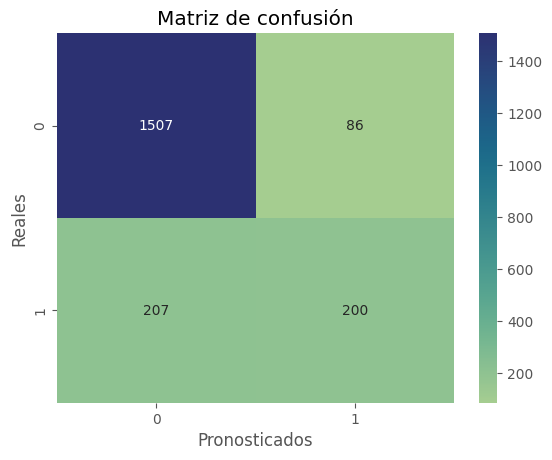

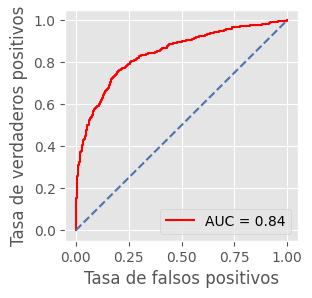

In [ ]:
# Crear un modelo XGBClassifier
model = xgb.XGBClassifier()

# Entrenamiento
model.fit(X_train, y_train)

# Predicciones sobre el conjunto de pruebas
y_pred = model.predict(X_test)

# Calcular precisión
evaluate_model(y_test,y_pred)

# Separar con espacios
print("\n\n\n")

# Graficar AUC-ROC
y_proba=model.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print el mejor parámetro
print("Mejores parámetros: ", grid_search.best_params_)

# Print la mejor validación cruzada
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print ('Entrenando')
# Evaluate el mejor modelo model probado
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_train, y_train)
print("Precisión sobre los datos de prueba: ", accuracy)
print(classification_report(y_train, y_train_pred))

print ('')

print ('Probando')
# Evaluate best model testing
accuracy = best_model.score(X_test, y_test)
print("Precisión sobre los datos de prueba: ", accuracy)
print(classification_report(y_test, y_test_pred))

Mejores parámetros:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mejor puntaje de validación cruzada:  0.8637499999999999
Entrenando
Precisión sobre los datos de prueba:  0.88025
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6370
           1       0.83      0.52      0.64      1630

    accuracy                           0.88      8000
   macro avg       0.86      0.75      0.78      8000
weighted avg       0.88      0.88      0.87      8000


Probando
Precisión sobre los datos de prueba:  0.8545
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.44      0.55       407

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Reporte de clasificación
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000


---------------------------------------------



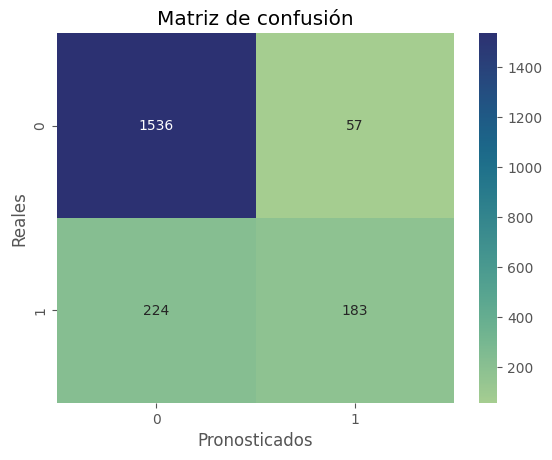

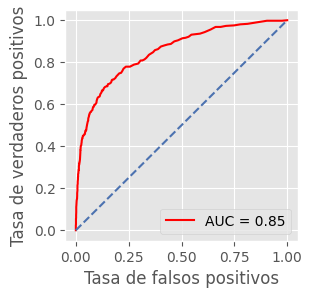

In [ ]:
# Creación del clasificador Random Forest
RFC = RandomForestClassifier(n_estimators=200, random_state=42)

# Entrenamiento del clasificador
RFC.fit(X_train, y_train)

# Predicciones
y_pred = RFC.predict(X_test)

# Evaluar el modelo
evaluate_model(y_test, y_pred)

# AUC-ROC
y_proba=RFC.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

***Calibración***

Exploremos posibilidades de mejora, generando variables adcionales.

(-1.0, 5.0)

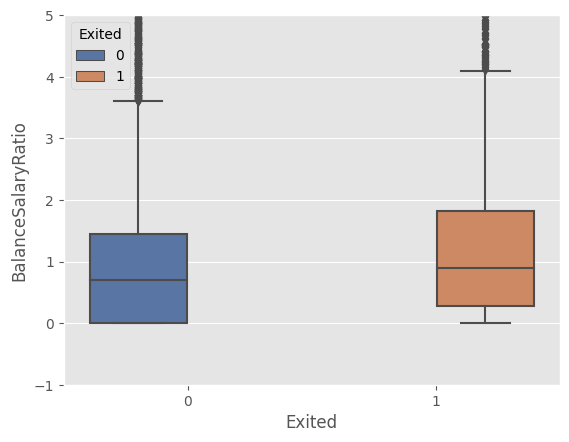

In [ ]:
# tasa balance/salario
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio', x = 'Exited', hue = 'Exited', data = df)
plt.ylim(-1, 5)

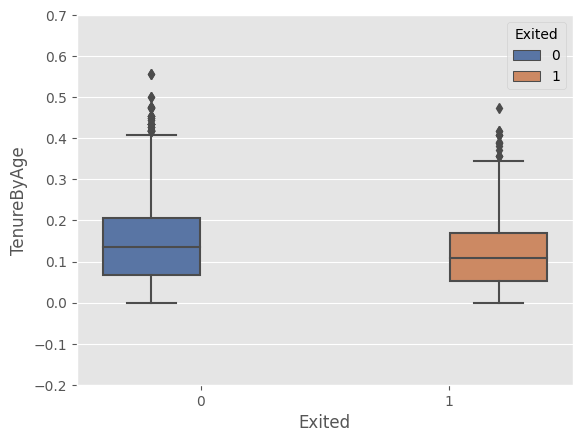

In [ ]:
# Tenure por edad
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge', x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-0.2, 0.7)
plt.show()

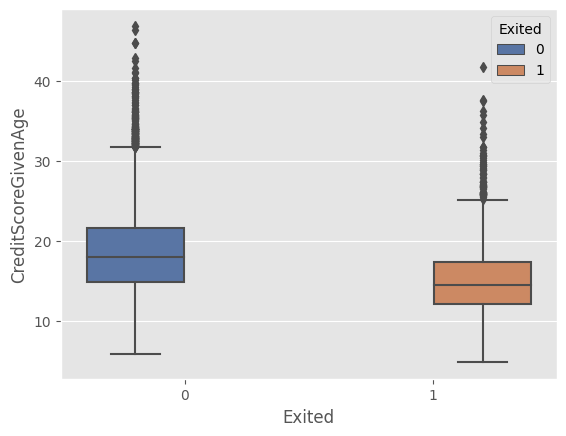

In [ ]:
# Credit Score dada la edad
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
sns.boxplot(y='CreditScoreGivenAge', x = 'Exited', hue = 'Exited', data = df)
plt.show()

In [ ]:
# reutilizando funciones:
categorical_columns = ['Geography','Gender']

one_hot_encoded = pd.get_dummies(df[categorical_columns])
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
df_encoded.drop(categorical_columns,axis=1,inplace=True)

In [ ]:
continuous_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio','TenureByAge','CreditScoreGivenAge']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.54,0.32,0.20,0.00,0.00,1,1,0.51,1,0.00,0.09,0.24,1,0,0,1,0
1,0.52,0.31,0.10,0.33,0.00,0,1,0.56,0,0.00,0.04,0.24,0,0,1,1,0
2,0.30,0.32,0.80,0.64,0.67,1,0,0.57,1,0.00,0.34,0.17,1,0,0,1,0
3,0.70,0.28,0.10,0.00,0.33,0,0,0.47,0,0.00,0.05,0.31,1,0,0,1,0
4,1.00,0.34,0.20,0.50,0.00,1,1,0.40,0,0.00,0.08,0.35,0,0,1,1,0


In [ ]:
X = df_encoded.drop('Exited',axis=1)
y = df_encoded['Exited']

print(X.shape)
print(y.shape)

(10000, 16)
(10000,)


In [ ]:
# Oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12740, 16)
(3186, 16)
(12740,)
(3186,)


In [ ]:
# Iteramos para cada modelo de la lista y lo evaluamos
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

    # Print the performance metrics
    print(f'Modelo/clasificador: {clf_name}')
    print(f'Average Accuracy (scoring: accuracy): {avg_accuracy:.4f}')
    print(f'Average Precision (scoring: precision_macro): {avg_precision:.4f}')
    print(f'Average Recall (scoring: recall_macro): {avg_recall:.4f}')
    print('-----------------------')

Modelo/clasificador: Logistic Regression
Average Accuracy (scoring: accuracy): 0.7143
Average Precision (scoring: precision_macro): 0.7144
Average Recall (scoring: recall_macro): 0.7143
-----------------------
Modelo/clasificador: Decision Tree
Average Accuracy (scoring: accuracy): 0.8202
Average Precision (scoring: precision_macro): 0.8207
Average Recall (scoring: recall_macro): 0.8218
-----------------------
Modelo/clasificador: Random Forest
Average Accuracy (scoring: accuracy): 0.8821
Average Precision (scoring: precision_macro): 0.8831
Average Recall (scoring: recall_macro): 0.8827
-----------------------
Modelo/clasificador: KNN
Average Accuracy (scoring: accuracy): 0.8238
Average Precision (scoring: precision_macro): 0.8332
Average Recall (scoring: recall_macro): 0.8238
-----------------------
Modelo/clasificador: Gaussion NB
Average Accuracy (scoring: accuracy): 0.6228
Average Precision (scoring: precision_macro): 0.7233
Average Recall (scoring: recall_macro): 0.6228
----------

In [ ]:
# GridSearch: Búsqueda exhaustiva sobre valores de parámetros especificados para un estimador.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print Best Parameter
print("Best Parameters: ", grid_search.best_params_)

# Print Best Cross Validation Score
print("Best Cross-Validation Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print ('Training')
# Evaluate best model testing
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_train, y_train)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_train, y_train_pred))

print ('')

print ('Testing')
# Evaluate best model testing
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_test, y_test_pred))

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Cross-Validation Score:  0.8919152276295135
Training
Accuracy on Test Data:  0.9435635792778649
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6370
           1       0.97      0.92      0.94      6370

    accuracy                           0.94     12740
   macro avg       0.94      0.94      0.94     12740
weighted avg       0.94      0.94      0.94     12740


Testing
Accuracy on Test Data:  0.9026993094789705
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1593
           1       0.92      0.88      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



Los resultados obtenidos sugieren que el mejor modelo es XGB.
<br>Los resultados del Logit fueron:

Modelo/clasificador: Logistic Regression<br>
Average Accuracy (scoring: accuracy): 0.7136<br>
Average Precision (scoring: precision_macro): 0.7137<br>
Average Recall (scoring: recall_macro): 0.7136
<br><br>
Los de XGB:<br>
Average Accuracy (scoring: accuracy): 0.8971<br>
Average Precision (scoring: precision_macro): 0.8979<br>
Average Recall (scoring: recall_macro): 0.8971<br>
